In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from scipy.sparse import hstack

In [ ]:
df=pd.read_csv("data_cleaned_final.csv")
df.head()

,COUNT_DISTINCT_of_subscriber_id,application_name,category_name,SUM_of_total_volume_bytes,SUM_of_duration,event_date_id,avg_volume_per_user,avg_duration_per_user,bytes_per_second,log_volume,log_users,log_duration
0,1146043,appspot,technology,8.528597e+10,439198370.0,2025-07-01,7.441778e+04,383.230271,194.185542,25.169276,13.951827,19.900462
1,12029,sip,communications,4.587429e+10,526090140.0,2025-07-01,3.813641e+06,43735.151717,87.198543,24.549171,9.395159,20.080983
2,10923,redflagdeals,socialnet,3.255068e+10,2186000.0,2025-07-01,2.980013e+06,200.128170,14890.515650,24.206064,9.298717,14.597584
3,35218,nowplayer,video,5.680121e+11,15868460.0,2025-07-01,1.612846e+07,450.578113,35795.035918,27.065409,10.469341,16.579844
4,57068,yandexdisk,cloudstorage,6.659874e+12,59962990.0,2025-07-01,1.167007e+08,1050.728780,111066.402845,29.527122,10.952016,17.909238


In [ ]:
df = df.drop(columns=["avg_volume_per_user", "avg_duration_per_user", "bytes_per_second", "log_volume", "log_users", "log_duration"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNT_DISTINCT_of_subscriber_id  1836 non-null   int64  
 1   application_name                 1836 non-null   object 
 2   category_name                    1836 non-null   object 
 3   SUM_of_total_volume_bytes        1836 non-null   float64
 4   SUM_of_duration                  1836 non-null   float64
 5   event_date_id                    1836 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 86.2+ KB


In [ ]:
df['category_name'].unique()

array(['technology', 'communications', 'socialnet', 'video',
       'cloudstorage', 'telco', 'finance', 'remote', 'ads', 'ecommerce',
       'update', 'ipcamera', 'games', 'web', 'net', 'misc',
       'productivity', 'appleservices', 'media', 'enterprise', 'music',
       'locationservices', 'tracker', 'deviceservices', 'cloudservices',
       'filesharing', 'applicationstore', 'vpn', 'proxy',
       'non-established', 'news', 'images', 'gov', 'security',
       'education', 'religion', 'cdn', 'transportation', 'attack', 'p2p',
       'lifestyle', 'yahooservices', 'content', 'mail', 'travel',
       'sports', 'backup', 'fooddrinks', 'googleservices', 'weather',
       'searchengine', 'rpc', 'homedecoration', 'automotive',
       'realestate', 'jobsearch', 'banking', 'dlmgr', 'file',
       'unclassified', 'mdm'], dtype=object)

In [ ]:
improved_mapping = {
     "games": "games_apps",
    "socialnet": "social_apps",
    "video": "video_apps",
    "cloudstorage": "cloud_apps",
    "cloudservices":"cloud_apps",
    "file": "cloud_apps",

    "backup":"cloud_apps",
    "filesharing":"cloud_apps",
    "technology": "tech_apps",
    "attack": "tech_apps",
    "cdn": "tech_apps",
    "security":"security_apps",
    "productivity":"productivity_apps",
    "content": "content_apps",
    "religion": "relegion_apps",
    "transportation": "transport_apps",
    "education" : "education_apps",
    "ads": "ads_apps",
    "images":"image_apps",
    "music":"music_apps",
    "gov":"gov_apps",
    "communications":"commun_apps",
    "tracker":"tracker_apps",
    "fooddrinks":"eat_apps",
    "finance": "finance_apps",
    "banking": "finance_apps",
    "ecommerce": "finance_apps",
    "realestate": "finance_apps",
    "jobsearch": "finance_apps",
    "travel":"travel_apps",
    "mail":"mail_apps",

    "telco": "telco_apps",
    "remote": "finance_apps",
    "vpn": "tech_apps",
    "news": "news_apps",
    "proxy": "tech_apps",
    "p2p": "tech_apps",
    "sports": "sports_apps",
    "weather": "weather_apps",
    "web": "web_apps",
    "net": "network_apps",
    "update": "update_apps",
    "ipcamera": "camera_apps",
    "media": "media_apps",
    "enterprise": "business_apps",
    "locationservices": "location_apps",
    "deviceservices": "device_apps",
    "applicationstore": "appstore_apps",
    "lifestyle": "lifestyle_apps",
    "yahooservices": "yahoo_apps",
    "googleservices": "google_apps",
    "appleservices": "apple_apps",
    "searchengine": "search_apps",
    "rpc": "tech_apps",
    "homedecoration": "home_apps",
    "automotive": "auto_apps",
    "dlmgr": "download_apps",
    "mdm": "device_apps",

    # Drop these meaningless categories by mapping them to NaN
    "non-established": None,
    "unclassified": None,
    "misc": None,
}
df['grouped_category'] = df['category_name'].map(improved_mapping)

# Remove only the truly meaningless categories
df = df.dropna(subset=['grouped_category'])
print(f"After removing meaningless categories: {df.shape}")

# Recalculate your engineered features (important!)
df['avg_volume_per_user'] = df['SUM_of_total_volume_bytes'] / df['COUNT_DISTINCT_of_subscriber_id']
df['avg_duration_per_user'] = df['SUM_of_duration'] / df['COUNT_DISTINCT_of_subscriber_id']
df['bytes_per_second'] = df['SUM_of_total_volume_bytes'] / df['SUM_of_duration']

# Replace infinities and NaN
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['avg_volume_per_user', 'avg_duration_per_user', 'bytes_per_second'])

print(f"Final clean data shape: {df.shape}")
print(f"Unique grouped categories: {df['grouped_category'].nunique()}")


After removing meaningless categories: (1833, 7)
Final clean data shape: (1833, 10)
Unique grouped categories: 42


In [ ]:
df['grouped_category'].unique()

array(['tech_apps', 'commun_apps', 'social_apps', 'video_apps',
       'cloud_apps', 'telco_apps', 'finance_apps', 'ads_apps',
       'update_apps', 'camera_apps', 'games_apps', 'web_apps',
       'network_apps', 'productivity_apps', 'apple_apps', 'media_apps',
       'business_apps', 'music_apps', 'location_apps', 'tracker_apps',
       'device_apps', 'appstore_apps', 'news_apps', 'image_apps',
       'gov_apps', 'security_apps', 'education_apps', 'relegion_apps',
       'transport_apps', 'lifestyle_apps', 'yahoo_apps', 'content_apps',
       'mail_apps', 'travel_apps', 'sports_apps', 'eat_apps',
       'google_apps', 'weather_apps', 'search_apps', 'home_apps',
       'auto_apps', 'download_apps'], dtype=object)

In [ ]:
numeric_cols = [
    "avg_volume_per_user",
    "avg_duration_per_user",
    "bytes_per_second",
    "COUNT_DISTINCT_of_subscriber_id"
]

categorical_cols = ["grouped_category"]

scaler = StandardScaler()
X_num = scaler.fit_transform(df[numeric_cols])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_cat = encoder.fit_transform(df[categorical_cols])

X_prepared = hstack([X_num, X_cat])
print(f"Prepared data shape: {X_prepared.shape}")

# Cluster
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_prepared)

Prepared data shape: (1833, 46)


In [ ]:

print("\n=== FINAL CLUSTERING RESULTS ===")
print("Cluster sizes:")
print(df['cluster'].value_counts())


=== FINAL CLUSTERING RESULTS ===
Cluster sizes:
cluster
1    1712
0      86
2      35
Name: count, dtype: int64


In [ ]:
from tabulate import tabulate

# Detailed cluster analysis
print("=== DETAILED CLUSTER ANALYSIS ===")

for cluster_num in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_num]
    print(f"\n--- CLUSTER {cluster_num} ({len(cluster_data)} apps) ---")

    # Top 10 categories in this cluster
    print("Top 10 grouped categories:")
    top_categories = cluster_data['grouped_category'].value_counts().head(10)
    print(tabulate(top_categories.reset_index().values, headers=['Category', 'Count'], tablefmt='grid'))

    # Usage statistics - BOTH MEDIAN AND MEAN
    median_volume_gb = cluster_data['avg_volume_per_user'].median() / (1024**3)
    mean_volume_gb = cluster_data['avg_volume_per_user'].mean() / (1024**3)
    median_duration_min = cluster_data['avg_duration_per_user'].median() / 60
    mean_duration_min = cluster_data['avg_duration_per_user'].mean() / 60
    median_speed = cluster_data['bytes_per_second'].median()
    mean_speed = cluster_data['bytes_per_second'].mean()
    median_users = cluster_data['COUNT_DISTINCT_of_subscriber_id'].median()
    mean_users = cluster_data['COUNT_DISTINCT_of_subscriber_id'].mean()

    stats_table = [
        ['Volume/user (GB)', f"{median_volume_gb:.2f}", f"{mean_volume_gb:.2f}"],
        ['Duration/user (min)', f"{median_duration_min:.2f}", f"{mean_duration_min:.2f}"],
        ['Speed (bytes/sec)', f"{median_speed:.2f}", f"{mean_speed:.2f}"],
        ['User count', f"{median_users:.2f}", f"{mean_users:.2f}"]
    ]
    print("\nUsage Statistics (Median | Mean):")
    print(tabulate(stats_table, headers=['Metric', 'Median', 'Mean'], tablefmt='grid'))

    # Top 5 apps by usage intensity
    print(f"\nTop 5 apps by usage intensity:")
    top_apps = cluster_data.nlargest(5, 'avg_volume_per_user')[['application_name', 'grouped_category', 'avg_volume_per_user']]
    top_apps['avg_volume_per_user'] = top_apps['avg_volume_per_user'] / (1024**3)
    print(tabulate(top_apps.values, headers=['App', 'Category', 'Volume/GB'], tablefmt='grid'))

# Compare clusters side by side
print("\n=== CLUSTER COMPARISON TABLE ===")
cluster_comparison = df.groupby('cluster').agg({
    'avg_volume_per_user': ['median', 'mean'],
    'avg_duration_per_user': ['median', 'mean'],
    'bytes_per_second': ['median', 'mean'],
    'COUNT_DISTINCT_of_subscriber_id': ['median', 'mean']
})

# Convert volume and duration to GB and min in the summary
cluster_comparison[('avg_volume_per_user', 'median')] /= (1024**3)
cluster_comparison[('avg_volume_per_user', 'mean')] /= (1024**3)
cluster_comparison[('avg_duration_per_user', 'median')] /= 60
cluster_comparison[('avg_duration_per_user', 'mean')] /= 60

print(tabulate(cluster_comparison.reset_index().values, headers=cluster_comparison.reset_index().columns, tablefmt='grid'))


=== DETAILED CLUSTER ANALYSIS ===

--- CLUSTER 0 (86 apps) ---
Top 10 grouped categories:
+--------------+---------+
| Category     |   Count |
+==============+=========+
| commun_apps  |      14 |
+--------------+---------+
| ads_apps     |      11 |
+--------------+---------+
| games_apps   |      10 |
+--------------+---------+
| tech_apps    |       7 |
+--------------+---------+
| device_apps  |       7 |
+--------------+---------+
| network_apps |       6 |
+--------------+---------+
| video_apps   |       4 |
+--------------+---------+
| social_apps  |       4 |
+--------------+---------+
| web_apps     |       3 |
+--------------+---------+
| camera_apps  |       2 |
+--------------+---------+

Usage Statistics (Median | Mean):
+---------------------+---------------+----------------+
| Metric              |        Median |           Mean |
+=====================+===============+================+
| Volume/user (GB)    |   0.01        |    0.08        |
+---------------------+---

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Calculate silhouette score
silhouette_avg = silhouette_score(X_prepared, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Cluster stability test
inertias = []
for random_state in range(5):
    km = KMeans(n_clusters=3, random_state=random_state)
    km.fit(X_prepared)
    inertias.append(km.inertia_)
print(f"Cluster stability: {np.std(inertias):.3f}")


Silhouette Score: 0.658
Cluster stability: 0.000


the first results is a bit pullted and random !
let's try another categories (by eliminating some)

In [ ]:

user_facing_categories = [
    'social_apps', 'games_apps', 'video_apps', 'music_apps',
    'news_apps', 'sports_apps', 'weather_apps', 'finance_apps',
    'travel_apps', 'education_apps', 'productivity_apps',
    'image_apps', 'content_apps', 'lifestyle_apps', 'tech_apps'
]

# Filter to keep only user-facing apps
df_user_facing = df[df['grouped_category'].isin(user_facing_categories)].copy()

summary_table = [
    ['User-facing apps', len(df_user_facing)],
    ['Infrastructure apps removed', len(df) - len(df_user_facing)]
]
print(tabulate(summary_table, headers=['Metric', 'Count'], tablefmt='grid'))

# Prepare numeric and categorical features
numeric_cols = ["avg_volume_per_user", "avg_duration_per_user", "bytes_per_second", "COUNT_DISTINCT_of_subscriber_id"]
categorical_cols = ["grouped_category"]

scaler = StandardScaler()
X_num = scaler.fit_transform(df_user_facing[numeric_cols])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_cat = encoder.fit_transform(df_user_facing[categorical_cols])

X_prepared = hstack([X_num, X_cat])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_user_facing['cluster'] = kmeans.fit_predict(X_prepared)

# Cluster sizes table
cluster_sizes = df_user_facing['cluster'].value_counts().sort_index().reset_index()
cluster_sizes.columns = ['Cluster', 'Size']
print("\n=== USER-FACING APPS CLUSTERING ===")
print(tabulate(cluster_sizes.values, headers=cluster_sizes.columns, tablefmt='grid'))

# Analyze age patterns per cluster
for cluster_num in sorted(df_user_facing['cluster'].unique()):
    cluster_data = df_user_facing[df_user_facing['cluster'] == cluster_num]
    print(f"\n--- CLUSTER {cluster_num} ---")

    # Top categories table
    top_categories = cluster_data['grouped_category'].value_counts().head(5).reset_index()
    top_categories.columns = ['Category', 'Count']
    print("Top categories:")
    print(tabulate(top_categories.values, headers=top_categories.columns, tablefmt='grid'))

    # Median usage stats
    median_volume_gb = cluster_data['avg_volume_per_user'].median() / (1024**3)
    median_duration_min = cluster_data['avg_duration_per_user'].median() / 60
    stats_table = [
        ['Median volume/user (GB)', f"{median_volume_gb:.2f}"],
        ['Median duration/user (min)', f"{median_duration_min:.2f}"]
    ]
    print("Usage stats:")
    print(tabulate(stats_table, headers=['Metric', 'Value'], tablefmt='grid'))


+-----------------------------+---------+
| Metric                      |   Count |
+=============================+=========+
| User-facing apps            |    1007 |
+-----------------------------+---------+
| Infrastructure apps removed |     826 |
+-----------------------------+---------+

=== USER-FACING APPS CLUSTERING ===
+-----------+--------+
|   Cluster |   Size |
+===========+========+
|         0 |    972 |
+-----------+--------+
|         1 |     20 |
+-----------+--------+
|         2 |     15 |
+-----------+--------+

--- CLUSTER 0 ---
Top categories:
+--------------+---------+
| Category     |   Count |
+==============+=========+
| video_apps   |     295 |
+--------------+---------+
| social_apps  |     233 |
+--------------+---------+
| tech_apps    |     130 |
+--------------+---------+
| games_apps   |      66 |
+--------------+---------+
| finance_apps |      53 |
+--------------+---------+
Usage stats:
+----------------------------+---------+
| Metric              

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Calculate silhouette score
silhouette_avg = silhouette_score(X_prepared, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Cluster stability test
inertias = []
for random_state in range(5):
    km = KMeans(n_clusters=3, random_state=random_state)
    km.fit(X_prepared)
    inertias.append(km.inertia_)
print(f"Cluster stability: {np.std(inertias):.3f}")


Silhouette Score: 0.729
Cluster stability: 137.513


In [ ]:
user_facing_categories = [#without tech_apps
    'social_apps', 'games_apps', 'video_apps', 'music_apps',
    'news_apps', 'sports_apps', 'weather_apps', 'finance_apps',
    'shopping_apps', 'travel_apps', 'education_apps', 'productivity_apps',
    'image_apps', 'content_apps', 'lifestyle_apps', 'commu_apps'
]

# Filter to keep only user-facing apps
df_user_facing = df[df['grouped_category'].isin(user_facing_categories)].copy()

summary_table = [
    ['User-facing apps', len(df_user_facing)],
    ['Infrastructure apps removed', len(df) - len(df_user_facing)]
]
print(tabulate(summary_table, headers=['Metric', 'Count'], tablefmt='grid'))

# Prepare numeric and categorical features
numeric_cols = ["avg_volume_per_user", "avg_duration_per_user", "bytes_per_second", "COUNT_DISTINCT_of_subscriber_id"]
categorical_cols = ["grouped_category"]

scaler = StandardScaler()
X_num = scaler.fit_transform(df_user_facing[numeric_cols])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_cat = encoder.fit_transform(df_user_facing[categorical_cols])

X_prepared = hstack([X_num, X_cat])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_user_facing['cluster'] = kmeans.fit_predict(X_prepared)

# Cluster sizes table
cluster_sizes = df_user_facing['cluster'].value_counts().sort_index().reset_index()
cluster_sizes.columns = ['Cluster', 'Size']
print("\n=== USER-FACING APPS CLUSTERING ===")
print(tabulate(cluster_sizes.values, headers=cluster_sizes.columns, tablefmt='grid'))

# Analyze age patterns per cluster
for cluster_num in sorted(df_user_facing['cluster'].unique()):
    cluster_data = df_user_facing[df_user_facing['cluster'] == cluster_num]
    print(f"\n--- CLUSTER {cluster_num} ---")

    # Top categories table
    top_categories = cluster_data['grouped_category'].value_counts().head(5).reset_index()
    top_categories.columns = ['Category', 'Count']
    print("Top categories:")
    print(tabulate(top_categories.values, headers=top_categories.columns, tablefmt='grid'))

    # Median usage stats
    median_volume_gb = cluster_data['avg_volume_per_user'].median() / (1024**3)
    median_duration_min = cluster_data['avg_duration_per_user'].median() / 60
    stats_table = [
        ['Median volume/user (GB)', f"{median_volume_gb:.2f}"],
        ['Median duration/user (min)', f"{median_duration_min:.2f}"]
    ]
    print("Usage stats:")
    print(tabulate(stats_table, headers=['Metric', 'Value'], tablefmt='grid'))


+-----------------------------+---------+
| Metric                      |   Count |
+=============================+=========+
| User-facing apps            |     875 |
+-----------------------------+---------+
| Infrastructure apps removed |     958 |
+-----------------------------+---------+

=== USER-FACING APPS CLUSTERING ===
+-----------+--------+
|   Cluster |   Size |
+===========+========+
|         0 |    843 |
+-----------+--------+
|         1 |     13 |
+-----------+--------+
|         2 |     19 |
+-----------+--------+

--- CLUSTER 0 ---
Top categories:
+----------------+---------+
| Category       |   Count |
+================+=========+
| video_apps     |     295 |
+----------------+---------+
| social_apps    |     233 |
+----------------+---------+
| games_apps     |      67 |
+----------------+---------+
| finance_apps   |      53 |
+----------------+---------+
| lifestyle_apps |      46 |
+----------------+---------+
Usage stats:
+----------------------------+-------

**Conclusion:** :even tho we see the same categories in all clusters but we should only foucus on categories, we see the usage and duration per user , for example in cluster one the usage volume is 1.44 GB per user and a duration of 845 min which is most likely to be a cluster of youths and adults 15-28 or 25, and in cluster 2 we see video_apps is the most dominant (example youtube) so it is a middle age cluster.


Cluster 1: Youth/Young adults (15-25) - extreme usage patterns

Cluster 2: Middle-aged adults (25-45) - substantial but controlled usage

Cluster 0: Older adults/Casual users (45+) - minimal, functional usage

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Calculate silhouette score
silhouette_avg = silhouette_score(X_prepared, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Cluster stability test
inertias = []
for random_state in range(5):
    km = KMeans(n_clusters=3, random_state=random_state)
    km.fit(X_prepared)
    inertias.append(km.inertia_)
print(f"Cluster stability: {np.std(inertias):.3f}")


Silhouette Score: 0.733
Cluster stability: 139.038


Cluster Medians (GB/user and minutes/user):


,cluster,median_volume_gb,median_duration_min
0,0,0.001709,7.495191
1,1,1.437222,845.316528
2,2,0.514741,28.677596


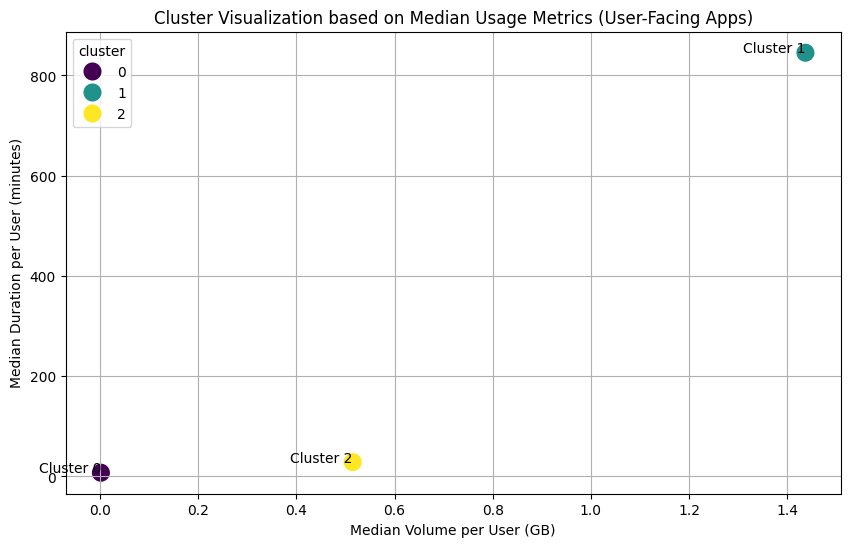

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate median volume/user and duration/user for each cluster
cluster_medians = df_user_facing.groupby('cluster').agg(
    median_volume_gb=('avg_volume_per_user', lambda x: x.median() / (1024**3)),
    median_duration_min=('avg_duration_per_user', lambda x: x.median() / 60)
).reset_index()

print("Cluster Medians (GB/user and minutes/user):")
display(cluster_medians)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_volume_gb', y='median_duration_min', hue='cluster', data=cluster_medians, s=200, palette='viridis')

# Add labels for each cluster point
for i in range(len(cluster_medians)):
    plt.text(cluster_medians['median_volume_gb'][i], cluster_medians['median_duration_min'][i],
             f"Cluster {cluster_medians['cluster'][i]}",
             fontsize=10, ha='right')

plt.title('Cluster Visualization based on Median Usage Metrics (User-Facing Apps)')
plt.xlabel('Median Volume per User (GB)')
plt.ylabel('Median Duration per User (minutes)')
plt.grid(True)
#plt.show()

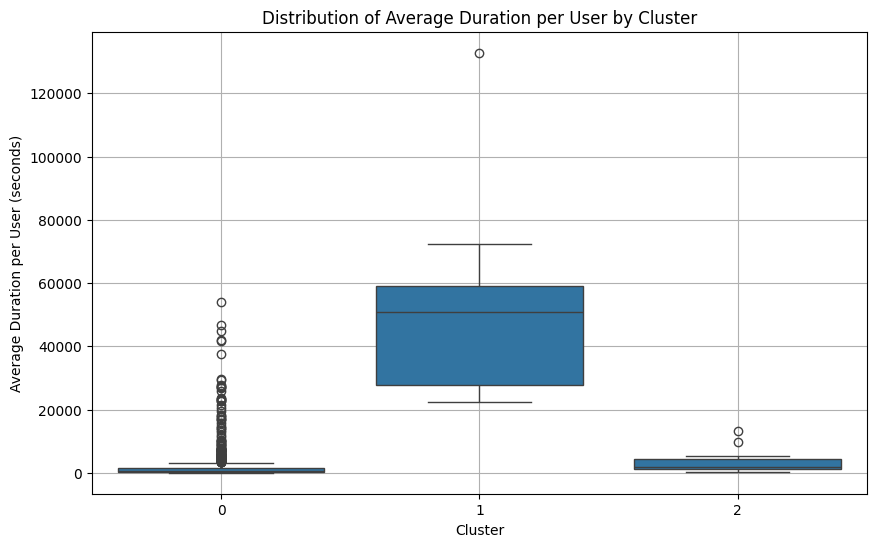

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='avg_duration_per_user', data=df_user_facing)

# Adding titles and labels
plt.title('Distribution of Average Duration per User by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Duration per User (seconds)')
plt.grid(True)

# Display the plot
#plt.show()

In [ ]:
cluster_stats = df_user_facing.groupby('cluster').agg({
    'avg_volume_per_user': ['median'],
    'avg_duration_per_user': ['median'],
}).round(2)

print("=== CLUSTER REFERENCE ===")
for cluster_id in [0, 1, 2]:
    vol_gb = cluster_stats.loc[cluster_id, ('avg_volume_per_user', 'median')] / (1024**3)
    dur_min = cluster_stats.loc[cluster_id, ('avg_duration_per_user', 'median')] / 60
    cluster_names = {0: "Casual Users", 1: "Power Users", 2: "Moderate Users"}
    print(f"Cluster {cluster_id} ({cluster_names[cluster_id]}): {vol_gb:.3f} GB, {dur_min:.1f} min")

# Create test data
test_data = [
    {
        'test_name': 'Heavy Gaming',
        'expected_cluster': 1,
        'COUNT_DISTINCT_of_subscriber_id': 12000,
        'application_name': 'realistic_heavy_game',
        'category_name': 'games',
        'SUM_of_total_volume_bytes': int(1.44e9 * 12000),
        'SUM_of_duration': int(845 * 60 * 12000),
    },
    {
        'test_name': 'Video Streaming',
        'expected_cluster': 2,
        'COUNT_DISTINCT_of_subscriber_id': 25000,
        'application_name': 'realistic_video_streaming',
        'category_name': 'video',
        'SUM_of_total_volume_bytes': int(0.51e9 * 25000),
        'SUM_of_duration': int(28.68 * 60 * 25000),
    },
    {
        'test_name': 'Light Social',
        'expected_cluster': 0,
        'COUNT_DISTINCT_of_subscriber_id': 500000,
        'application_name': 'realistic_social_light',
        'category_name': 'socialnet',
        'SUM_of_total_volume_bytes': int(0.001e9 * 500000),
        'SUM_of_duration': int(7.5 * 60 * 500000),
    },
    {
        'test_name': 'Heavy Productivity',
        'expected_cluster': 1,
        'COUNT_DISTINCT_of_subscriber_id': 8000,
        'application_name': 'realistic_productivity_heavy',
        'category_name': 'productivity',
        'SUM_of_total_volume_bytes': int(1.2e9 * 8000),
        'SUM_of_duration': int(600 * 60 * 8000),
    },
    {
        'test_name': 'tech APP',
        'expected_cluster': 1,  # Conservative expectation
        'COUNT_DISTINCT_of_subscriber_id': 9299952,
        'application_name': 'realistic_music_app',
        'category_name': 'technology',
        'SUM_of_total_volume_bytes': int(9939190621175.0),
        'SUM_of_duration': int(44938218920.0),
    }
]


print(f"\n{'='*80}")
print("MODEL PREDICTION RESULTS")
print(f"{'='*80}")

# Process and collect results
results = []
for data in test_data:
    try:
        # Create DataFrame and preprocess
        new_df = pd.DataFrame([data])
        new_df['grouped_category'] = new_df['category_name'].map(improved_mapping)
        mask = (new_df['grouped_category'].isna()) | (~new_df['grouped_category'].isin(user_facing_categories))
        new_df.loc[mask, 'grouped_category'] = 'unknown_category'
        # Feature engineering
        new_df['avg_volume_per_user'] = new_df['SUM_of_total_volume_bytes'] / new_df['COUNT_DISTINCT_of_subscriber_id']
        new_df['avg_duration_per_user'] = new_df['SUM_of_duration'] / new_df['COUNT_DISTINCT_of_subscriber_id']
        new_df['bytes_per_second'] = new_df['SUM_of_total_volume_bytes'] / new_df['SUM_of_duration']
        new_df = new_df.replace([np.inf, -np.inf], np.nan).dropna()

        # Prepare features
        numeric_cols = ["avg_volume_per_user", "avg_duration_per_user", "bytes_per_second", "COUNT_DISTINCT_of_subscriber_id"]
        categorical_cols = ["grouped_category"]

        X_num_new = scaler.transform(new_df[numeric_cols])
        X_cat_new = encoder.transform(new_df[categorical_cols])
        X_prepared_new = hstack([X_num_new, X_cat_new])

        # Predict
        predicted_cluster = kmeans.predict(X_prepared_new)[0]

        # Calculate metrics
        volume_gb = new_df['avg_volume_per_user'].iloc[0] / (1024**3)
        duration_min = new_df['avg_duration_per_user'].iloc[0] / 60

        # Store result
        results.append({
            'Test Case': data['test_name'],
            'Category': new_df['grouped_category'].iloc[0],
            'Expected': data['expected_cluster'],
            'Predicted': predicted_cluster,
            'Match': '✅' if predicted_cluster == data['expected_cluster'] else '❌',
            'Volume (GB)': f"{volume_gb:.3f}",
            'Duration (min)': f"{duration_min:.1f}",
            'Users': f"{new_df['COUNT_DISTINCT_of_subscriber_id'].iloc[0]:,}"
        })

    except Exception as e:
        results.append({
            'Test Case': data['test_name'],
            'Category': 'ERROR',
            'Expected': data['expected_cluster'],
            'Predicted': 'ERROR',
            'Match': '❌',
            'Volume (GB)': 'N/A',
            'Duration (min)': 'N/A',
            'Users': 'N/A'
        })

results_df = pd.DataFrame(results)
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))

# Summaryy
total_tests = len(results)
correct_predictions = sum(1 for r in results if r['Match'] == '✅')
accuracy = (correct_predictions / total_tests) * 100

print(f"\n{'='*80}")
print("SUMMARY")
print(f"{'='*80}")
print(f"Total Tests: {total_tests}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Accuracy: {accuracy:.1f}%")
print(f"{'='*80}")

# Cluster name mapping for reference
cluster_names = {0: "Casual Users", 1: "Power Users", 2: "Moderate Users"}
print("\nCluster Reference:")
for cluster_id, name in cluster_names.items():
    print(f"  {cluster_id}: {name}")


=== CLUSTER REFERENCE ===
Cluster 0 (Casual Users): 0.002 GB, 7.5 min
Cluster 1 (Power Users): 1.437 GB, 845.3 min
Cluster 2 (Moderate Users): 0.515 GB, 28.7 min

MODEL PREDICTION RESULTS
+--------------------+-------------------+------------+-------------+---------+---------------+------------------+-----------+
| Test Case          | Category          |   Expected |   Predicted | Match   |   Volume (GB) |   Duration (min) | Users     |
+====================+===================+============+=============+=========+===============+==================+===========+
| Heavy Gaming       | games_apps        |          1 |           1 | ✅      |         1.341 |            845   | 12,000    |
+--------------------+-------------------+------------+-------------+---------+---------------+------------------+-----------+
| Video Streaming    | video_apps        |          2 |           2 | ✅      |         0.475 |             28.7 | 25,000    |
+--------------------+-------------------+----------

the conclusion is that the model won't be like an exact rules but rather it focuses on high usage means cluster 1 i.e youth class , as generally they are the ones who uses most.

In [ ]:
# Define the prediction function with unknown category handling
def predict_user_segment(test_data, scaler, encoder, kmeans, user_facing_categories, improved_mapping):
    """
    Predict cluster with proper handling of unknown categories
    """
    # Create DataFrame
    new_df = pd.DataFrame([test_data])

    # Step 1: Map categories using your improved_mapping
    new_df['grouped_category'] = new_df['category_name'].map(improved_mapping)

    # Step 2: Handle unknown categories
    # If category maps to None or not in user_facing_categories
    mask = (new_df['grouped_category'].isna()) | (~new_df['grouped_category'].isin(user_facing_categories))
    new_df.loc[mask, 'grouped_category'] = 'unknown_category'

    # Step 3: Feature engineering (same as training)
    new_df['avg_volume_per_user'] = new_df['SUM_of_total_volume_bytes'] / new_df['COUNT_DISTINCT_of_subscriber_id']
    new_df['avg_duration_per_user'] = new_df['SUM_of_duration'] / new_df['COUNT_DISTINCT_of_subscriber_id']
    new_df['bytes_per_second'] = new_df['SUM_of_total_volume_bytes'] / new_df['SUM_of_duration']

    # Handle infinities and NaN
    new_df = new_df.replace([np.inf, -np.inf], np.nan)
    new_df = new_df.dropna(subset=['avg_volume_per_user', 'avg_duration_per_user', 'bytes_per_second'])

    if len(new_df) == 0:
        return None  # Invalid data

    # Step 4: Prepare features
    numeric_cols = ["avg_volume_per_user", "avg_duration_per_user", "bytes_per_second", "COUNT_DISTINCT_of_subscriber_id"]
    categorical_cols = ["grouped_category"]

    X_num = scaler.transform(new_df[numeric_cols])
    X_cat = encoder.transform(new_df[categorical_cols])  # 'unknown_category' → all zeros
    X_prepared = hstack([X_num, X_cat])

    # Step 5: Predict cluster
    predicted_cluster = kmeans.predict(X_prepared)[0]

    return {
        'predicted_cluster': predicted_cluster,
        'grouped_category': new_df['grouped_category'].iloc[0],
        'volume_gb': new_df['avg_volume_per_user'].iloc[0] / (1024**3),
        'duration_min': new_df['avg_duration_per_user'].iloc[0] / 60,
        'users': new_df['COUNT_DISTINCT_of_subscriber_id'].iloc[0]
    }

# Get actual statistics from your clusters to create realistic test data
cluster_stats = df_user_facing.groupby('cluster').agg({
    'avg_volume_per_user': ['median'],
    'avg_duration_per_user': ['median'],
}).round(2)

print("=== CLUSTER REFERENCE ===")
for cluster_id in [0, 1, 2]:
    vol_gb = cluster_stats.loc[cluster_id, ('avg_volume_per_user', 'median')] / (1024**3)
    dur_min = cluster_stats.loc[cluster_id, ('avg_duration_per_user', 'median')] / 60
    cluster_names = {0: "Casual Users", 1: "Power Users", 2: "Moderate Users"}
    print(f"Cluster {cluster_id} ({cluster_names[cluster_id]}): {vol_gb:.3f} GB, {dur_min:.1f} min")



=== CLUSTER REFERENCE ===
Cluster 0 (Casual Users): 0.002 GB, 7.5 min
Cluster 1 (Power Users): 1.437 GB, 845.3 min
Cluster 2 (Moderate Users): 0.515 GB, 28.7 min


here how we can test the model

Step 1: Collect application Input


In [ ]:
print("=== USER SEGMENT PREDICTION TEST ===")

# Basic app info
app_name = input("Enter app name: ")
category = input("Enter category (games/video/social/technology/etc): ")

# Usage data
total_users = int(input("Enter total number of users: "))
total_volume_bytes = int(input("Enter total volume in bytes: "))
total_duration_seconds = int(input("Enter total duration in seconds: "))

print(f"\nYou entered:")
print(f"App: {app_name}")
print(f"Category: {category}")
print(f"Users: {total_users:,}")
print(f"Volume: {total_volume_bytes:,} bytes")
print(f"Duration: {total_duration_seconds:,} seconds")


=== USER SEGMENT PREDICTION TEST ===
Enter app name: copilot
Enter category (games/video/social/technology/etc): productivity
Enter total number of users: 55576
Enter total volume in bytes: 69356483247
Enter total duration in seconds: 40366220

You entered:
App: copilot
Category: productivity
Users: 55,576
Volume: 69,356,483,247 bytes
Duration: 40,366,220 seconds


Step 2: Create Test Data Structure


In [ ]:
app_name='ai'
category='socialnet'
total_users=820940
total_volume_bytes=98936503922664
total_duration_seconds=19920768780

In [ ]:
# Build test data dictionary
test_data = {
    'application_name': app_name,
    'category_name': category,
    'COUNT_DISTINCT_of_subscriber_id': total_users,
    'SUM_of_total_volume_bytes': total_volume_bytes,
    'SUM_of_duration': total_duration_seconds
}

print("\nTest data created!")



Test data created!


Step 3: Run Prediction


In [ ]:
# Call your prediction function
result = predict_user_segment(
    test_data, scaler, encoder, kmeans,
    user_facing_categories, improved_mapping
)

if result:
    print(f"\n=== PREDICTION RESULTS ===")
    print(f"Predicted Cluster: {result['predicted_cluster']}")
    print(f"Mapped Category: {result['grouped_category']}")
    print(f"Volume per user: {result['volume_gb']:.3f} GB")
    print(f"Duration per user: {result['duration_min']:.1f} minutes")
else:
    print("ERROR: Could not make prediction")



=== PREDICTION RESULTS ===
Predicted Cluster: 0
Mapped Category: social_apps
Volume per user: 0.112 GB
Duration per user: 404.4 minutes
